In [0]:
# CSC 59929 - Introduction to Machine Learning, Fall 2019 @ CCNY
# Name: HASIBUL ISLAM


In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import warnings
%matplotlib inline

In [0]:
#using some data file from 
#https://www.zillow.com/research/data/
#https://streeteasy.com/blog/data-dashboard/
#external dataset from new york open data
##https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j

train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
submit1_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)
exdf = pd.read_csv('https://data.cityofnewyork.us/resource/43nn-pn8j.csv',index_col=0)


In [3]:
train_df.sample(5)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7212457,#10C,81373,3,3.0,2128.0,2018-05-27 16:02:31,1049 5 AVENUE,New York,10028,40.780998,-73.959999,1046842.0,1014977501,22.0,1928.0,3.1833,1,1,0,0,0,0,1,0,0,0,1,0,0,0,13500,0,"Perfectly located and newly renovated, this th...",Upper East Side,Manhattan,10C,10.0,C
7185334,#4A,53347,1,1.0,475.0,2018-05-17 09:05:54,435 WEST 45 STREET,New York,10036,40.761188,-73.992622,1026442.0,1010550015,5.0,1901.0,5.1833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1985,0,**NEWLY RENOVATED**\n **HEART OF HELL'S KITCHE...,Midtown West,Manhattan,4A,4.0,A
7375150,#3B,299551,1,1.0,600.0,2018-07-17 14:38:05,891 HERKIMER STREET,Brooklyn,11233,40.678455,-73.923755,3048064.0,3017040063,4.0,2013.0,1.0167,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1850,1,1 Bathroom with a balcony lots of natural ligh...,Bedford-Stuyvesant,Brooklyn,3B,3.0,B
7317934,#L,632098,2,1.0,820.0,2018-06-28 21:35:47,422 61 STREET,Brooklyn,11220,40.639585,-74.018362,3143726.0,3057910017,4.0,1912.0,2.1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1900,1,"Beautifully maintained, sunny, large 2BR/1BA a...",Sunset Park,Brooklyn,L,NaN,NaN
7235428,#30J,50986,0,1.0,550.0,2018-06-04 13:08:21,271 WEST 47 STREET,New York,10036,40.760509,-73.986998,1086225.0,1010190001,31.0,1981.0,2.3333,1,1,0,1,0,1,1,0,0,0,0,0,0,0,3395,1,Best Alcove Studio layout - as large as most o...,Midtown,Manhattan,30J,30.0,J


In [0]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',
    'addr_zip','floor_count',#'has_elevator',#'has_dishwasher',	#'is_furnished',	
    'has_gym','allows_pets',#'has_garage',
    'has_concierge',#'has_pool',#'has_garden',	
    #the reason of commenting out certain feature is because they are increasing mean squared error
]
train_features = train_df[feature_cols] 

# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = train_df['rent']

In [5]:
# using linear regression method
lreg = LinearRegression()
lreg.fit(train_features, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
test_features = test_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(train_features.median(), axis=0)

# construct predictions 
test_df['predicted'] = lreg.predict(test_features)
print("Prediction using Linear Regression train data against Test1:")

print("Mean Squared Error for Test1 using Linear Regression:",mean_squared_error(test_df['rent'], test_df['predicted']))


Prediction using Linear Regression train data against Test1:
Mean Squared Error for Test1 using Linear Regression: 3313817.143868871


In [7]:
#test_df.sample(3)
real=test_df['rent']
predicted=test_df['predicted']
from sklearn.metrics import explained_variance_score
print("Explained variance regression score function")
print("Best possible score is 1.0, lower values are worse.")
print(explained_variance_score(real, predicted,multioutput='uniform_average'))
print("-------------------------------------------------------")
from sklearn.metrics import r2_score
print("R^2 (coefficient of determination) regression score function:")
print(r2_score(real, predicted, multioutput='variance_weighted'))

Explained variance regression score function
Best possible score is 1.0, lower values are worse.
0.5559738486087318
-------------------------------------------------------
R^2 (coefficient of determination) regression score function:
0.5556196902015677


In [8]:
rf = RandomForestRegressor()
rf.fit(train_features, train_target)

# construct predictions 
test_df['predicted'] = rf.predict(test_features)
print("Prediction using Random Forest Regressor train data against Test1:")
print("Mean Squared Error for Test1 using Random Forest Regressor:",mean_squared_error(test_df['rent'], test_df['predicted']))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Prediction using Random Forest Regressor train data against Test1:
Mean Squared Error for Test1 using Random Forest Regressor: 1876538.0510223694


In [9]:
real=test_df['rent']
predicted=test_df['predicted']
from sklearn.metrics import explained_variance_score
print("Explained variance regression score function")
print("Best possible score is 1.0, lower values are worse.")
print(explained_variance_score(real, predicted,multioutput='uniform_average'))
print("-------------------------------------------------------")
from sklearn.metrics import r2_score
print("R^2 (coefficient of determination) regression score function:")
print(r2_score(real, predicted, multioutput='variance_weighted'))

Explained variance regression score function
Best possible score is 1.0, lower values are worse.
0.748359960759083
-------------------------------------------------------
R^2 (coefficient of determination) regression score function:
0.7483577022332937


In [10]:
#trying GradientBoostingRegressor
from sklearn import ensemble
params = {'n_estimators': 12000, 'max_depth': 2, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
egb = ensemble.GradientBoostingRegressor(**params)

egb.fit(train_features, train_target)
# construct predictions 
test_df['predicted'] = egb.predict(test_features)
print("Prediction using GradientBoostingRegressor train data against Test1:")
print("Mean Squared Error for Test1 using GradientBoostingRegressor:",mean_squared_error(test_df['rent'], test_df['predicted']))

Prediction using GradientBoostingRegressor train data against Test1:
Mean Squared Error for Test1 using GradientBoostingRegressor: 1720228.7848562503


In [11]:
real=test_df['rent']
predicted=test_df['predicted']
from sklearn.metrics import explained_variance_score
print("Explained variance regression score function")
print("Best possible score is 1.0, lower values are worse.")
print(explained_variance_score(real, predicted,multioutput='uniform_average'))
print("-------------------------------------------------------")
from sklearn.metrics import r2_score
print("R^2 (coefficient of determination) regression score function:")
print(r2_score(real, predicted, multioutput='variance_weighted'))

Explained variance regression score function
Best possible score is 1.0, lower values are worse.
0.7693223390436726
-------------------------------------------------------
R^2 (coefficient of determination) regression score function:
0.7693186536399758


In [0]:
#joining training data and test1 data to incredase total training data
master_df = train_df.append(test_df, sort=False)

In [13]:
#setting external data
cols=['dba','zipcode','grade']
trnexdf=exdf[cols].dropna()
print(trnexdf.shape)


(475, 3)


In [14]:
#trnexdf=trnexdf[trnexdf.grade == 'A']
#trnexdf.sort_values(by=['zipcode'])
#trnexdf.zipcode.unique()
#trnexdf.drop_duplicates(subset ="zipcode",keep = False, inplace = True) 
print(master_df.shape)

(14000, 39)


In [15]:
#preparing dataset to join to training data
tempfeat=['addr_zip','description','has_dishwasher']
tempdf=master_df[tempfeat]
tempdf=tempdf.rename(columns={"addr_zip": "rest_zip", "description": "rest_grade", "has_dishwasher": "rest_name"}, errors="raise")

#filling values
for i in range(14000):
         tempdf.iloc[i,1]='U'
         tempdf.iloc[i,2]='Unknown'
tempdf.sample(5)


,rest_zip,rest_grade,rest_name
rental_id,,,
7509895,11104,U,Unknown
7421950,11385,U,Unknown
7293757,10128,U,Unknown
7499257,11213,U,Unknown
7414990,10009,U,Unknown


In [0]:
#matching zip codes with restaurant zip code and copying grade and name
#this takes few minutes
#rental records: 14000
#restaurant records: 496
for i in range(14000):
    for j in range(496):
        if tempdf.iloc[i,0]==int(trnexdf.iloc[j,1]):
                    tempdf.iloc[i,1]=trnexdf.iloc[j,2]
                    tempdf.iloc[i,2]=trnexdf.iloc[j,0]
                    break

In [17]:
print("Amount of Rentals that doesn't have restaurant records")
print(tempdf[tempdf.rest_grade == 'U'].shape)

Amount of Rentals that doesn't have restaurant records
(13975, 3)


In [18]:
#joining external data with training data
#now we can see restaurants name and grade corresponding to zip code
master_df=master_df.assign(rest_zip=tempdf["rest_zip"])
master_df=master_df.assign(rest_grade=tempdf["rest_grade"])
master_df=master_df.assign(rest_name=tempdf["rest_name"])
print("Find your Favourite Restaurant in your neighborhood")
master_df.sample(5)

Find your Favourite Restaurant in your neighborhood


,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,predicted,rest_zip,rest_grade,rest_name
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7430728,#D4,80134,1,1.0,0.0,2018-08-01 15:14:23,435 EAST 76 STREET,New York,10021,40.769901,-73.952202,1045956.0,1014717501,9.0,1900.0,6.6500,1,1,0,1,0,0,1,0,0,0,0,0,1,0,3000,0,UNIQUE AND MODERN\r\nDOORMAN/ELEVATOR\r\n435 E...,Upper East Side,Manhattan,D4,4.0,D,2745.791097,10021,U,Unknown
7191532,#2B,22288,2,1.0,850.0,2018-05-18 16:56:26,188 BLEECKER STREET,New York,10012,40.729050,-74.001454,1008303.0,1005260025,6.0,1900.0,2.8333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4100,0,Perfectly Renovated Huge l 2 bed with exposed ...,Greenwich Village,Manhattan,2B,2.0,B,NaN,10012,U,Unknown
7266892,#2,19597,2,2.0,2522.0,2018-06-12 18:55:28,438 BROOME STREET,New York,10013,40.721771,-73.999206,1007241.0,1004830038,5.0,1900.0,1.2833,0,1,0,1,0,0,1,1,0,0,0,0,0,0,12000,0,"Rarely available 2,522 sq ft pre-war loft in b...",Soho,Manhattan,2,2.0,NaN,NaN,10013,U,Unknown
7436059,#2012,1225675,1,1.0,720.0,2018-08-02 15:10:47,2600 NETHERLAND AVENUE,Bronx,10463,40.878700,-73.914703,2083247.0,2057220475,30.0,1975.0,5.8167,1,1,0,1,0,1,1,0,0,0,1,1,0,0,2099,1,Price Reduction! HIgh-floor Junior-Four with E...,Riverdale,Bronx,2012,20.0,12,2740.800017,10463,U,Unknown
7158025,#2,509014,2,1.0,900.0,2018-05-08 14:16:08,308 EAST 56 STREET,Brooklyn,11203,40.649424,-73.924635,3104015.0,3047270023,2.0,1950.0,15.2333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1825,0,"Email/text only please. \n\nThis lovely, true ...",East Flatbush,Brooklyn,2,2.0,NaN,NaN,11203,U,Unknown


In [19]:
new_feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',
    'addr_zip','floor_count',	
    'has_gym','allows_pets',
    'has_concierge',
    #'rest_grade' #Error could not convert string to float: 'B'
]
master_features = master_df[new_feature_cols].fillna(master_df[new_feature_cols].median(), axis=0)
master_target = master_df['rent']
#linear regression
#lreg.fit(master_features, master_target)

#Train the model
#Random Forest Regressor
rf.fit(master_features, master_target)

#test3 size
print(submit1_df.shape)

(2000, 38)


In [20]:
#building temporary dataframe to join to test3
tfeat=['addr_zip','description','has_dishwasher']
temp2df=submit1_df[tfeat]
temp2df.sample(5)
print(temp2df.shape)

(2000, 3)


In [21]:
#filling temporary data frame value
for i in range(2000):
         temp2df.iloc[i,1]='U'
         temp2df.iloc[i,2]='Unknown'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
#renaming column names and validating
temp2df=temp2df.rename(columns={"addr_zip": "rest_zip", "description": "rest_grade", "has_dishwasher": "rest_name"}, errors="raise")
temp2df.sample(5)

,rest_zip,rest_grade,rest_name
rental_id,,,
7495756,10128,U,Unknown
7506415,11215,U,Unknown
7512700,10038,U,Unknown
7525078,11213,U,Unknown
7495342,10025,U,Unknown


In [0]:
#matching test3 zip codes with restaurant zip code and copying grade and name
#this takes few minutes
#rental records: 2000
#restaurant records: 496
for i in range(2000):
    for j in range(496):
        if temp2df.iloc[i,0]==int(trnexdf.iloc[j,1]):
                    temp2df.iloc[i,1]=trnexdf.iloc[j,2]
                    temp2df.iloc[i,2]=trnexdf.iloc[j,0]
                    break

In [24]:
#assigning restaurant table to test3 
submit1_df=submit1_df.assign(rest_zip=temp2df["rest_zip"])
submit1_df=submit1_df.assign(rest_grade=temp2df["rest_grade"])
submit1_df=submit1_df.assign(rest_name=temp2df["rest_name"])

print("Find Your Favourite Restaurant")
submit1_df.sample(5)

Find Your Favourite Restaurant


,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,rest_zip,rest_grade,rest_name
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7442872,#A1,87892,1,1.0,0.0,2018-08-04 00:51:22,1742 1 AVENUE,New York,10128,40.779469,-73.947088,1050720.0,1015700002,6.0,1910.0,8.1500,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,0,FOR SEPTEMBER 1st OCCUPANCY. Large true one be...,Upper East Side,Manhattan,A1,1.0,A,10128,U,Unknown
7438873,#1,300793,2,1.0,0.0,2018-08-03 10:34:52,177 HOPKINS STREET,Brooklyn,11206,40.699816,-73.945196,3048338.0,3017220048,3.0,1931.0,1.7667,0,0,0,1,0,0,1,0,0,0,0,0,1,0,NaN,1,Newly renovated true 2 bedroom (not a railroad...,Bedford-Stuyvesant,Brooklyn,1,1.0,NaN,11206,U,Unknown
7448575,#68,35470,2,1.0,800.0,2018-08-06 17:08:38,237 8 AVENUE,New York,10011,40.744934,-73.999163,1013361.0,1007460038,6.0,1910.0,0.6333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1,NO FEE! Available for immediate occupancy is t...,Chelsea,Manhattan,68,NaN,NaN,10011,U,Unknown
7503865,#4B,317617,1,1.0,757.0,2018-08-23 12:51:22,582 THROOP AVENUE,Brooklyn,11216,40.683307,-73.941190,3052834.0,3018407501,4.0,1910.0,3.6167,0,0,0,1,0,0,1,0,0,0,0,0,0,0,NaN,0,"Welcome home to 582 Throop Ave #4B, a newly re...",Bedford-Stuyvesant,Brooklyn,4B,4.0,B,11216,U,Unknown
7465162,#20H,388,1,1.0,670.0,2018-08-10 15:01:12,71 BROADWAY,New York,10006,40.707500,-74.012497,1000810.0,1000210006,23.0,1900.0,0.4833,1,1,0,1,0,1,1,0,0,0,1,0,0,0,NaN,1,NO BROKER FEES. 71 Broadway Apartments offers ...,Financial District,Manhattan,20H,20.0,H,10006,U,Unknown


In [0]:
#handling missing data
submit1_features = submit1_df[new_feature_cols].fillna(master_df[new_feature_cols].median(), axis=0)


In [0]:
#predict the rent for test3 using random forest
submit1_df['rent'] = rf.predict(submit1_features)
submit1_df['rent'].to_csv('test3.csv', header=True)
#compare mean squared

In [27]:
#see if prediction makes sense
submit1_df.sample(3)


,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,rest_zip,rest_grade,rest_name
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7466680,#1R,395026,2,1.0,1000.0,2018-08-10 20:45:37,1559 DE KALB AVENUE,Brooklyn,11237,40.703117,-73.920759,3073659.0,3032370059,4.0,1931.0,1.7000,0,0,0,1,0,0,0,1,0,0,0,0,1,0,2558.900000,1,"2 Bed / 1 Bath at 1559 Dekalb Ave, Brooklyn, N...",Bushwick,Brooklyn,1R,1.0,R,11237,U,Unknown
7440925,#N13L,49894,1,1.0,683.0,2018-08-03 15:15:59,401 EAST 34 STREET,New York,10016,40.743801,-73.972504,1022057.0,1009660001,35.0,1985.0,9.3167,1,1,0,0,0,1,1,0,1,1,1,0,1,1,4197.791667,1,Fully renovated and LARGE 1 bedroom apartment ...,Midtown East,Manhattan,N13L,13.0,NL,10016,U,Unknown
7481668,#3C,18718036,2,1.0,0.0,2018-08-16 10:56:05,335 WEST 43 STREET,New York,10036,40.758801,-73.990700,1078865.0,1010340009,0.0,NaN,1.9167,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2495.000000,1,$2950 Ready to move in now or Sept 1st. \r\n2...,Midtown West,Manhattan,3C,3.0,C,10036,U,Unknown


In [0]:
#for submission
#predict the rent for test3 using ensemble gradient boost
egb.fit(master_features, master_target)
submit1_df['rent'] = egb.predict(submit1_features)
submit1_df['rent'].to_csv('test3.csv', header=True)
#compare mean squared

In [29]:
#see if prediction makes sense
submit1_df.sample(3)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,rest_zip,rest_grade,rest_name
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7500499,#1F,367906,0,1.0,360.0,2018-08-22 13:51:07,246 DRIGGS AVENUE,Brooklyn,11222,40.722911,-73.947717,3066853.0,3026820035,3.0,1931.0,1.9167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1962.974350,0,First floor studio with lots of light on the c...,Greenpoint,Brooklyn,1F,1.0,F,11222,U,Unknown
7451542,#5J,51523,0,1.0,520.0,2018-08-07 12:55:08,350 WEST 42 STREET,New York,10036,40.757900,-73.992302,1087264.0,1010327501,60.0,2007.0,1.6500,1,1,0,1,0,1,0,0,1,1,1,1,0,1,3124.953280,1,No Fee: Alcove Studio in Modern White Glove F...,Midtown West,Manhattan,5J,5.0,J,10036,U,Unknown
7485274,#310,390097,1,1.0,800.0,2018-08-17 08:42:02,476 JEFFERSON STREET,Brooklyn,11237,40.708618,-73.921596,3072427.0,3031780020,4.0,1950.0,2.7333,0,1,0,0,0,0,1,0,0,1,0,0,0,0,2168.836225,1,$0 Broker fee! Beautiful true converted wareho...,Bushwick,Brooklyn,310,3.0,10,11237,U,Unknown


In [30]:
submit1_df['rent'].sample(10)

rental_id
7498804    2045.606566
7474810    2259.980608
7443928    2612.427775
7441030    1304.303830
7511653    4893.834694
7437484    2089.379410
7498450    4544.787493
7478860    5213.030023
7455268    2844.400282
7503934    4081.848007
Name: rent, dtype: float64

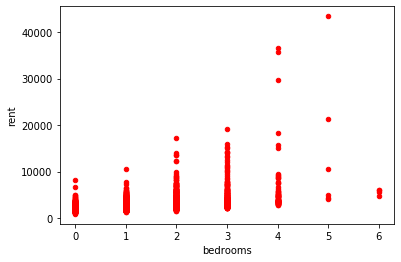

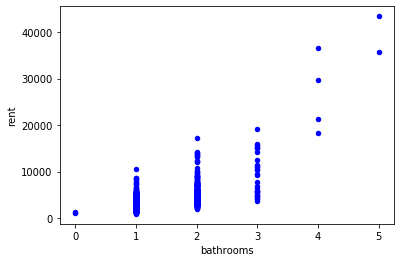

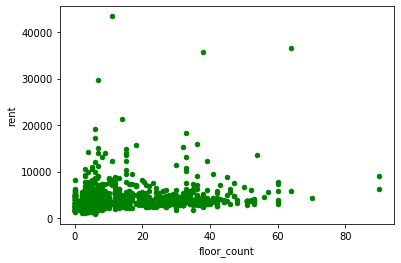

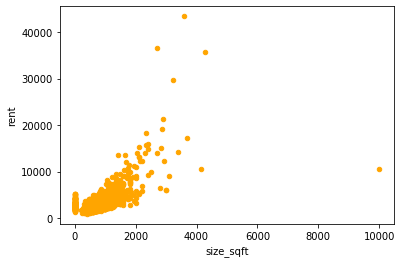

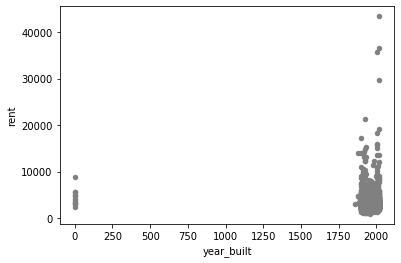

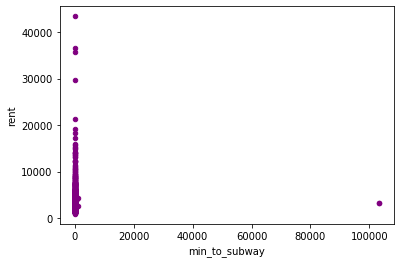

In [31]:
# Scatter plots of different features for test3 data: 

submit1_df.plot(kind='scatter',x='bedrooms',y='rent',color='red')
plt.show()

submit1_df.plot(kind='scatter',x='bathrooms',y='rent',color='blue')
plt.show()

submit1_df.plot(kind='scatter',x='floor_count',y='rent',color='green')
plt.show()

submit1_df.plot(kind='scatter',x='size_sqft',y='rent',color='orange')
plt.show()

submit1_df.plot(kind='scatter',x='year_built',y='rent',color='gray')
plt.show()

submit1_df.plot(kind='scatter',x='min_to_subway',y='rent',color='purple')
plt.show()

#lines = submit1_df.plot.line(x='bedrooms',y='rent')

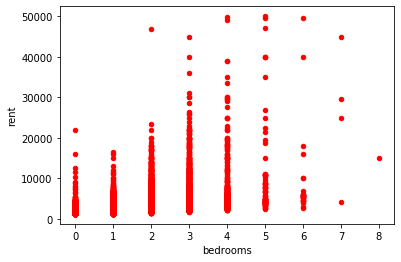

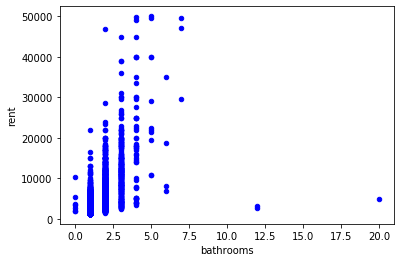

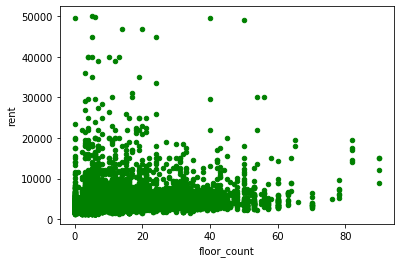

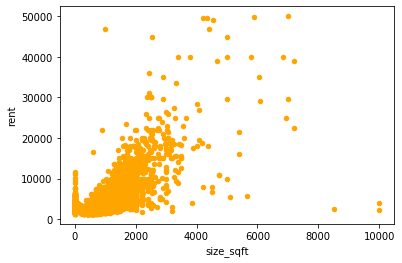

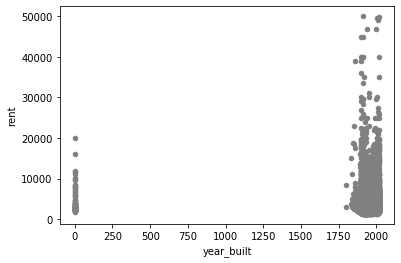

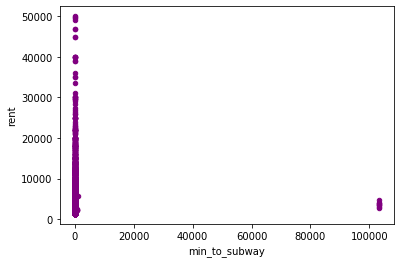

In [32]:
# Scatter plots of different features for training data: 

master_df.plot(kind='scatter',x='bedrooms',y='rent',color='red')
plt.show()

master_df.plot(kind='scatter',x='bathrooms',y='rent',color='blue')
plt.show()

master_df.plot(kind='scatter',x='floor_count',y='rent',color='green')
plt.show()

master_df.plot(kind='scatter',x='size_sqft',y='rent',color='orange')
plt.show()

master_df.plot(kind='scatter',x='year_built',y='rent',color='gray')
plt.show()

master_df.plot(kind='scatter',x='min_to_subway',y='rent',color='purple')
plt.show()




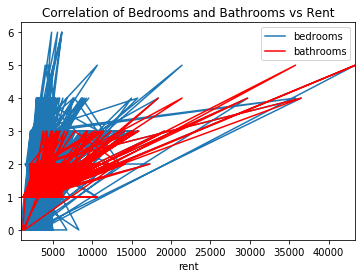

In [33]:
ax = plt.gca()
submit1_df.plot(kind='line',x='rent',y='bedrooms',title='Correlation of Bedrooms and Bathrooms vs Rent',ax=ax)
submit1_df.plot(kind='line',x='rent',y='bathrooms', color='red', ax=ax)
#submit1_df.plot(kind='line',x='rent',y='floornumber', color='green', ax=ax)
plt.show()

In [34]:
#OLS Regression Results for Test3 Data
# Add a constant to our existing dataframe for modeling purposes
submit1_df = sm.add_constant(submit1_df)

est = sm.OLS(submit1_df['rent'], 
             submit1_features[['bedrooms', 'year_built', 'bathrooms', 'min_to_subway','size_sqft', 'no_fee', 'has_doorman','addr_zip','floor_count','has_gym','allows_pets']]
            ).fit()

print(est.summary())



                                 OLS Regression Results                                
Dep. Variable:                   rent   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              1359.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                        0.00
Time:                        20:50:45   Log-Likelihood:                         -17364.
No. Observations:                2000   AIC:                                  3.475e+04
Df Residuals:                    1989   BIC:                                  3.481e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
#OLS Regression Results for Training Data
# Add a constant to our existing dataframe for modeling purposes
master_df = sm.add_constant(master_df)

est = sm.OLS(master_df['rent'], 
             master_features[['bedrooms', 'year_built', 'bathrooms', 'min_to_subway','size_sqft', 'no_fee', 'has_doorman','addr_zip','floor_count','has_gym','allows_pets']]
            ).fit()

print(est.summary())


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                                 OLS Regression Results                                
Dep. Variable:                   rent   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              6487.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                        0.00
Time:                        20:50:45   Log-Likelihood:                     -1.2528e+05
No. Observations:               14000   AIC:                                  2.506e+05
Df Residuals:                   13989   BIC:                                  2.507e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------